<a href="https://colab.research.google.com/github/azastron/ML_NeuralNetworks/blob/main/HW5_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify Images
This is the second task of Homework 5 of Andreas Muller course on Applied Machine Learning offered at Columbia during the Spring 2020 semester.

Train a multilayer perceptron (fully connected) on the Fashion MNIST dataset using the traditional train/test split as given by fashion_mnist.load_data in keras. Use a separate 10000 samples (from the training set) for model selection and to compute learning curves (accuracy vs epochs, not accuracy vs n_samples). Compare a “vanilla” model with a model using drop-out and evaluate if using drop-out allows you to learn a bigger network. Then, compare to a model using batch normalization. Visualize learning curves for all models.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
X_test.shape

(10000, 28, 28)

The labels/targets are arrays of integers, ranging from 0 to 9, so we have 10 distinct classes. The class_names are copied from tensorflow tutorial page.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

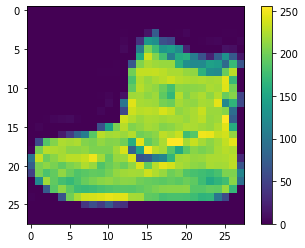

In [8]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

We see from the above figure that images are 28x28 numpy arrays and pixels range from 0 to 255.
We divide them by 255 to scale between 0 and 1.

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0


Let's display the first 25 images from the training set and display the class name below each image (from the tutorial).

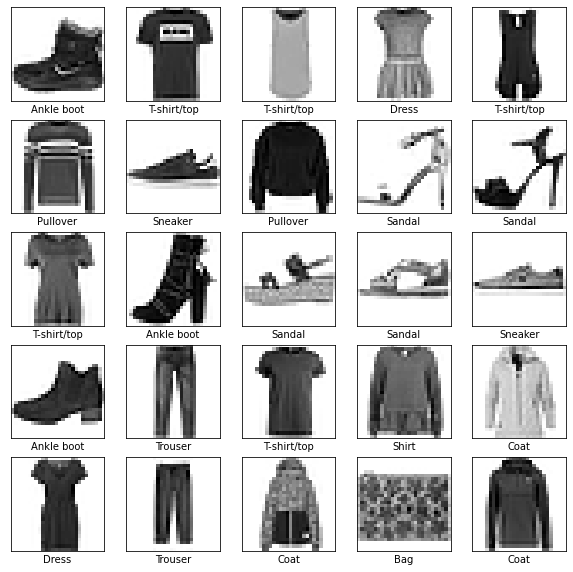

In [10]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

In [11]:
model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    Dense(10)
])

From tensorflow tutorial:
The first layer in this network, Flatten, tranforms the format of the images from a 2D array (28x28 pixels) to a 1D array (28x28=784 pixels). 

Then we have two densely connected or fully connected layers, with 128 and 10 nodes or neurons, respectively. In the last layer, each node contains a score that indicates the current image belongs to one of the 10 classes. 

In [12]:
#model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [13]:
model.fit(X_train, y_train, epochs=10, validation_split=0.1)
#batch_size=128

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5118 - accuracy: 0.8212 - val_loss: 0.4184 - val_accuracy: 0.8503
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3840 - accuracy: 0.8634 - val_loss: 0.3874 - val_accuracy: 0.8593
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3449 - accuracy: 0.8751 - val_loss: 0.3559 - val_accuracy: 0.8745
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3201 - accuracy: 0.8833 - val_loss: 0.3496 - val_accuracy: 0.8727
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3008 - accuracy: 0.8899 - val_loss: 0.3283 - val_accuracy: 0.8840
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2853 - accuracy: 0.8947 - val_loss: 0.3361 - val_accuracy: 0.8778
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.8983 - val_loss: 0.3381 - val_accuracy:

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test Loss: 0.331
Test Accuracy: 0.885


In [15]:
history_callback = model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.1)

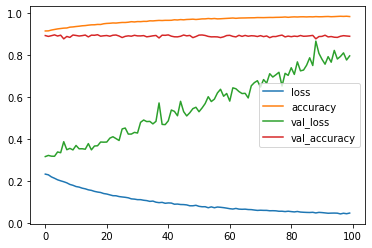

In [16]:
pd.DataFrame(history_callback.history).plot()

In [17]:
max(history_callback.history['accuracy'])

0.9835370182991028

In [18]:
max(history_callback.history['val_accuracy'])

0.8956666588783264

Create a model using drop-out

In [5]:
model_dropout = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    #Dense(128, activation='relu'),
                    #Dropout(0.5),
                    Dense(10)
])

In [6]:
model_dropout.compile("adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.1)

In [8]:
score = model_dropout.evaluate(X_test, y_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test Loss: 0.427
Test Accuracy: 0.887


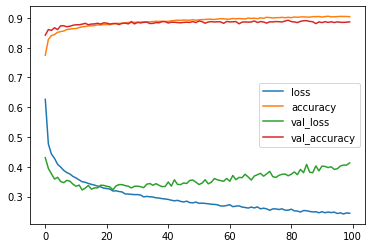

In [9]:
pd.DataFrame(history_dropout.history).plot()

A model using batch normalization

In [5]:
model_bn = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dense(10)
])

In [6]:
model_bn.compile("adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
history_bn = model_bn.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.1)

In [8]:
score = model_bn.evaluate(X_test, y_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test Loss: 0.504
Test Accuracy: 0.873


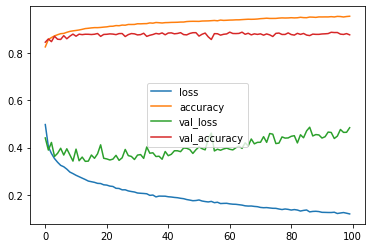

In [9]:
pd.DataFrame(history_bn.history).plot()